# Load libraries

In [ ]:
!pip install Biopython
!pip install gdown
!pip install pydna

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt
import json
import gdown
import gc
from pydna.assembly import Assembly
from pydna.dseqrecord import Dseqrecord
from pydna.design import primer_design, assembly_fragments
%matplotlib inline

## Load DNK sequences

This part for loading data from google drive

In [ ]:
url = 'https://drive.google.com/uc?id=1P-dkZg7Uy0NPdzUwY-a-qpTsNfw4FURX'
output = 'salmonella-enterica.reads.fna'
gdown.download(url, output, quiet=False)

url = 'https://drive.google.com/uc?id=1Or3tTlBb98A8u84XaCEpZPiK-IOYjzgh'
output = 'salmonella-enterica-variant.reads.fna'
gdown.download(url, output, quiet=False)

## Create new k-mers

In [ ]:
def build_kmers(sequence, dict_kmers, ksize):
    """
    Build k-mers from sequence
    """
    n_kmers = len(sequence) - ksize + 1
    for i in range(n_kmers):
        kmer = sequence[i:i + ksize]
        if kmer not in dict_kmers:
            dict_kmers[kmer] = 0
        dict_kmers[kmer] += 1
    return

First of all we choose k (hyper-parameter) as number as give us distribution (distribution of values of dictionary of k mers) that looks like Poisson distribution. And then create dicts with kmers

In [ ]:
input_file = "./salmonella-enterica.reads.fna"
input_file_var = "./salmonella-enterica-variant.reads.fna"


for KSIZE in [23]:

  fasta_sequences = SeqIO.parse(open(input_file), 'fasta')
  dict_kmers = dict()
  for fasta in fasta_sequences:
    sequence = str(fasta.seq)
    build_kmers(sequence, dict_kmers, KSIZE)
  json.dump(dict_kmers, open(f"/content/gdrive/MyDrive/Bioinformatics/dict_kmers_{KSIZE}.txt",'w'))
  del dict_kmers

  fasta_sequences_var = SeqIO.parse(open(input_file_var), 'fasta')
  dict_kmers_variant = dict()
  for fasta in fasta_sequences_var:
    sequence = str(fasta.seq)
    build_kmers(sequence, dict_kmers_variant, KSIZE)
  json.dump(dict_kmers_variant, open(f"/content/gdrive/MyDrive/Bioinformatics/dict_kmers_var_{KSIZE}.txt",'w'))
  del dict_kmers_variant

  gc.collect()

## Load and printing existing k-mers

Let's print our values of k_mers dictionary.

As we can see (first row of the plot) we have a lot of unique k-mers with amount 1-2. It means that it's a mistake of reading sequence. The mistakes distributed randomly and can't have a lot of amount of such combination unlike mutation. \\
Second row demonstrates us the distribution of k-mers which can be mutations.

In [ ]:
url = 'https://drive.google.com/uc?id=1VKZ_zQZh9NGlKxvQukRhTZ0iIlbEveO2'
output = 'dict_kmers_25.txt'
gdown.download(url, output, quiet=False)

url = 'https://drive.google.com/uc?id=1-0CugTOi0lxJtNPbswyS30L5hFrxZ70a'
output = 'dict_kmers_var_25.txt'
gdown.download(url, output, quiet=False)

In [ ]:
kmers_dict = json.load(open(f"./dict_kmers_23.txt"))
kmers_dict_var = json.load(open(f"./dict_kmers_var_23.txt"))

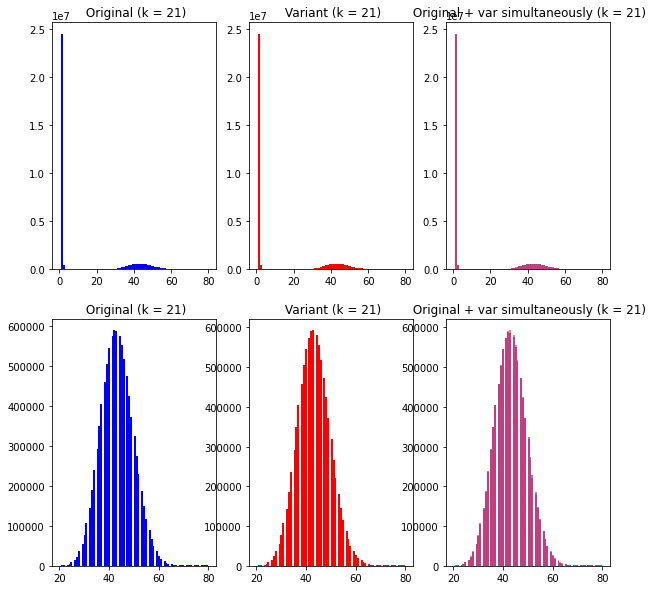

In [ ]:
f, axarr = plt.subplots(2, 3, figsize=(10, 10))
kmers_arr = np.array(list(kmers_dict.values()))
kmers_arr_var = np.array(list(kmers_dict_var.values()))
for enum in range(2):

  if enum == 0:
    axarr[enum,0].hist(kmers_arr,range = (0,80),bins = 80, label='The original',
                    color = 'blue')
    axarr[enum,0].set_title(f' Original (k = 21)')

    axarr[enum,1].hist(kmers_arr_var,range = (0,80),bins = 80, label='The variant',
                    color = 'red')
    axarr[enum,1].set_title(f' Variant (k = 21)')

    axarr[enum,2].hist(kmers_arr,range = (0,80),bins = 80, label='The original',
                    color = 'blue', alpha = 0.5)
    axarr[enum,2].hist(kmers_arr_var,range = (0,80),bins = 80, label='The variant',
                    color = 'red', alpha = 0.5)
    axarr[enum,2].set_title(f' Original + var simultaneously (k = 21)')
    

  else:
    axarr[enum,0].hist(kmers_arr,range = (20,80),bins = 80, label='The original',
                    color = 'blue')
    axarr[enum,0].set_title(f' Original (k = 21)')

    axarr[enum,1].hist(kmers_arr_var,range = (20,80),bins = 80, label='The variant',
                    color = 'red')
    axarr[enum,1].set_title(f' Variant (k = 21)')

    axarr[enum,2].hist(kmers_arr,range = (20,80),bins = 80, label='The original',
                    color = 'blue', alpha = 0.5)
    axarr[enum,2].hist(kmers_arr_var,range = (20,80),bins = 80, label='The variant',
                    color = 'red', alpha = 0.5)
    axarr[enum,2].set_title(f' Original + var simultaneously (k = 21)')

plt.show()

Then let's сount how many times each kmer, which is missing in first dictionary but appears in the second dictionary.

In [ ]:
# Here we check: doesn't kmer appear in second dictionary and if it's so
# we add frequency this kmer (which doesn't appear) in list

# Missing kmers in original
kmers_freq = [v for k, v in kmers_dict.items() if k not in kmers_dict_var]
# Missing kmers in variant
kmers_freq_var = [v for k, v in kmers_dict_var.items() if k not in kmers_dict]


We use here the same idea that we used above (about outliers)

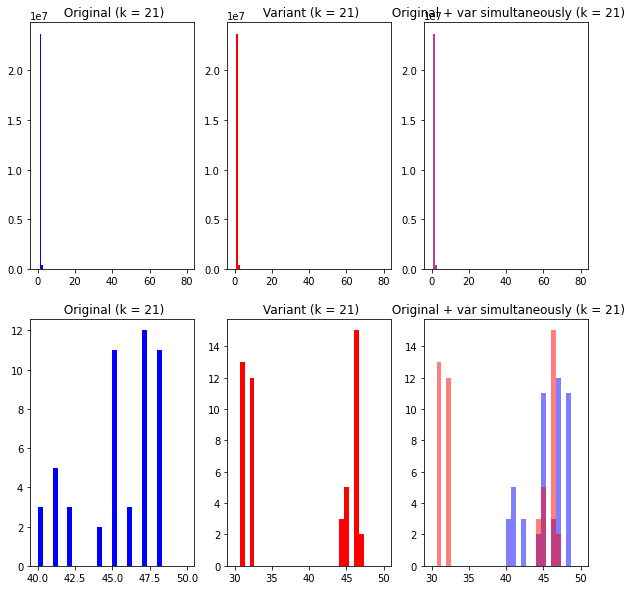

In [ ]:
f, axarr = plt.subplots(2, 3, figsize=(10, 10))
for enum in range(2):

  if enum == 0:
    axarr[enum,0].hist(kmers_freq,range = (0,80),bins = 80, label='The original',
                    color = 'blue')
    axarr[enum,0].set_title(f' Original (k = 21)')

    axarr[enum,1].hist(kmers_freq_var,range = (0,80),bins = 80, label='The variant',
                    color = 'red')
    axarr[enum,1].set_title(f' Variant (k = 21)')

    axarr[enum,2].hist(kmers_freq,range = (0,80),bins = 80, label='The original',
                    color = 'blue', alpha = 0.5)
    axarr[enum,2].hist(kmers_freq_var,range = (0,80),bins = 80, label='The variant',
                    color = 'red', alpha = 0.5)
    axarr[enum,2].set_title(f' Original + var simultaneously (k = 21)')
    

  else:
    axarr[enum,0].hist(kmers_freq,range = (40,50), bins = 30, label='The original',
                    color = 'blue')
    axarr[enum,0].set_title(f' Original (k = 21)')

    axarr[enum,1].hist(kmers_freq_var,range = (30,50), bins = 30, label='The variant',
                    color = 'red')
    axarr[enum,1].set_title(f' Variant (k = 21)')

    axarr[enum,2].hist(kmers_freq,range = (30,50), bins = 30, label='The original',
                    color = 'blue', alpha = 0.5)
    axarr[enum,2].hist(kmers_freq_var,range = (30,50), bins = 30, label='The variant',
                    color = 'red', alpha = 0.5)
    axarr[enum,2].set_title(f' Original + var simultaneously (k = 21)')

plt.show()

In [ ]:
del kmers_freq, kmers_freq_var, kmers_arr, kmers_arr_var
gc.collect()

247

It's easy to see that we have couple part of histograms. We will work with each of them separately. \\


First of all we will try to find mistake in right part of that data.

In [ ]:
kmers_assembly = [Dseqrecord(k) for k, f in kmers_dict.items() if ((f > 42.5) & (f < 50) & (k not in kmers_dict_var))]

In [ ]:
seq = Assembly(kmers_assembly, limit = 22).assemble_linear()
print(seq[0].seq.watson)

CTACACCTAGCTTCTGGGCGAGTTTACGGGTTGT


In [ ]:
kmers_assembly_var = [Dseqrecord(k) for k, f in kmers_dict_var.items() if ((f > 40) & (f < 50) & (k not in kmers_dict))]

In [ ]:
seq_var = Assembly(kmers_assembly_var,limit = 22).assemble_linear()
print(seq_var[0].seq.watson)

CTACACCTAGCTTCTGGGCGAGGGGACGGGTTGTTAAACCTTCGATT


Now let's compare this strings \\

CTACACCTAGCTTCTGGGCGAG_TTT_ACGGGTTGT \\
CTACACCTAGCTTCTGGGCGAG_GGG_ACGGGTTGT

Easy to see the mutation!

In [ ]:
kmers_assembly = [Dseqrecord(k) for k, f in kmers_dict.items() if ((f > 40) & (f < 42.5) & (k not in kmers_dict_var))]

In [ ]:
seq = Assembly(kmers_assembly,limit = 22).assemble_linear()
print(seq[0].seq.watson)

CAACCCGTAAACTCGCCCAGAAGCTAGGTG


In [ ]:
kmers_assembly_var = [Dseqrecord(k) for k, f in kmers_dict_var.items() if ((f > 30) & (f < 35) & (k not in kmers_dict))]

In [ ]:
seq_var = Assembly(kmers_assembly_var,limit = 22).assemble_linear()
print(seq_var[0].seq.watson)

AATCGAAGGTTTAACAACCCGTCCCCTCGCCCAGAAGCTAGGTGTAG


The next mutation is: \\
CAACCCGT_AAA_CTCGCCCAGAAGCTAGGTG \\
CAACCCGT_CCC_CTCGCCCAGAAGCTAGGTG